In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as tkr
%matplotlib inline
import re
import csv

from collections import Counter
from nltk.corpus import stopwords

In [5]:
# Read in TSV file
companies_df = pd.read_csv('../data/domains.tsv', sep='\t', names = ["company_name", "company_id", "url", "vertical"])
len(companies_df)

174701

In [21]:
companies_df.head(n=3)

,company_name,company_id,url,vertical
0,'K' BUILDERS (CONTRACTING) LTD,07456517,www.kp.nf.ca,41202 - Construction of domestic buildings
1,(IECC CARE) INDEPENDENT EXCEL CARE CONSORTIUM ...,08591892,www.iecc-care.co.uk,88990 - Other social work activities without a...
2,. . . A TROUBLE HALVED LIMITED,03771248,www.athdesign.co.uk,74100 - specialised design activities


In [6]:
# URL endings
def get_url_ending(url):
    return url[url.rfind("."):]

companies_df['url_ending'] = companies_df.url.apply(get_url_ending)

ending_counts = Counter(companies_df['url_ending'].tolist())
count_df = pd.DataFrame.from_dict(ending_counts, orient='index')
count_df.columns = ['count']
count_df[count_df['count']>10000]
# count_df = count_df[count_df['count'] >= 200]

,count
.uk,80452
.com,72431


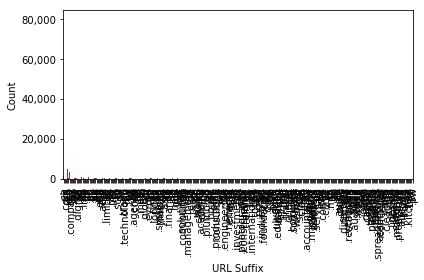

In [33]:
# Axis formatting with comma
def func(x, pos):  # formatter function takes tick label and tick position
   s = '{:0,d}'.format(int(x))
   return s

y_format = tkr.FuncFormatter(func)

# Plot and save to file
ax = count_df.plot(kind='bar', color='firebrick')
ax.set_xlabel("URL Suffix")
ax.set_ylabel("Count")
ax.legend_.remove()
ax.yaxis.set_major_formatter(y_format)
plt.tight_layout()
plt.savefig('../figures/suffix_barplot.png')

In [43]:
companies_df['missing_vertical'] = [1 if s == 'None Supplied' else 0 for s in companies_df['vertical']]
companies_df['vert_code'] = [re.sub('[^0-9]+', '', s).strip() for s in companies_df['vertical']]
companies_df['vert_desc'] = [re.sub('[^a-zA-Z -]+', '', s).strip() for s in companies_df['vertical']]
companies_df['vert_desc'] = [s[2:].lower() for s in companies_df['vert_desc']]
companies_df['url'] = ["".join(["http://www.", u]) if u[:4] != "www." else "".join(["http://", u]) for u in companies_df['url']]

search_string = re.compile('LTD|LIMITED')
companies_df['company_name_short'] = [re.sub(search_string, "", n).strip().lower() for n in companies_df['company_name']]
companies_df['is_small_name'] = [1 if len(s)<=3 else 0 for s in companies_df['company_name_short']]
companies_df.to_csv('../data/domains_clean.csv')

companies_df.head(n=5)

,company_name,company_id,url,vertical,missing_vertical,vert_code,vert_desc,company_name_short,is_small_name
0,'K' BUILDERS (CONTRACTING) LTD,07456517,http://www.kp.nf.ca,41202 - Construction of domestic buildings,0,41202,construction of domestic buildings,'k' builders (contracting),0
1,(IECC CARE) INDEPENDENT EXCEL CARE CONSORTIUM ...,08591892,http://www.iecc-care.co.uk,88990 - Other social work activities without a...,0,88990,other social work activities without accommoda...,(iecc care) independent excel care consortium,0
2,. . . A TROUBLE HALVED LIMITED,03771248,http://www.athdesign.co.uk,74100 - specialised design activities,0,74100,specialised design activities,. . . a trouble halved,0
3,100% SUCCESS LIMITED,06947920,http://www.100percent-success.co.uk,70229 - Management consultancy activities othe...,0,70229,management consultancy activities other than f...,100% success,0
4,1001 NIGHTS PRODUCTIONS LIMITED,06353157,http://www.1001nightsshow.com,90020 - Support activities to performing arts,0,90020,support activities to performing arts,1001 nights productions,0


Proportion of missing verticals: 0.128666
Number of unique verticals: 913


NameError: name 'y_format' is not defined

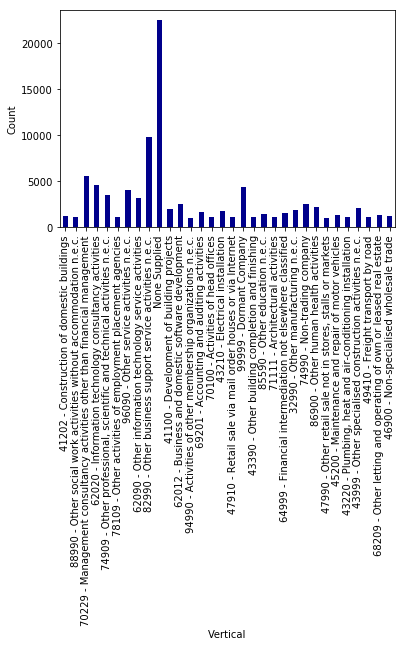

In [7]:
# Verticals
companies_df.describe()
len(companies_df[companies_df["vertical"] == 'None Supplied'])
print("Proportion of missing verticals: %f" % (len(companies_df[companies_df["vertical"] == 'None Supplied']) / len(companies_df)))

#
print("Number of unique verticals: %d" % len(set(companies_df['vertical'].tolist())))
vert_counts = Counter(companies_df['vertical'].tolist())
count_vert_df = pd.DataFrame.from_dict(vert_counts, orient='index')
count_vert_df.columns = ['count']
count_vert_df = count_vert_df[count_vert_df['count'] >= 1000]
ax = count_vert_df.plot(kind='bar', color='darkblue')
ax.set_xlabel("Vertical")
ax.set_ylabel("Count")
ax.legend_.remove()
ax.yaxis.set_major_formatter(y_format)
plt.savefig('figures/vertical_barplot.png')

In [11]:
# # Vertical SIC codes
# vert_list_codes = [re.sub('[^0-9]+', '', s).strip() for s in vert_list]
# vert_list_codes = list(set(map(int, filter(None, vert_list_codes))))
# vert_list_codes.sort()

# Vertical descriptions
vert_list = set(companies_df['vertical'].tolist())
vert_desc_list = [re.sub('[^a-zA-Z -]+', '', s).strip() for s in vert_list if s != "None Supplied"]
vert_desc_list = [word[2:] for word in vert_desc_list]  # remove initial "- " 
vert_desc_words = list(set(" ".join(vert_desc_list).split()))
stops = set(stopwords.words("english"))
vert_desc_words = [word.lower() for word in vert_desc_words if word not in stops and len(word) > 1]

# # Save words to file
# with open("../data/vert_desc_words.csv",'w') as f:
#     wr = csv.writer(f)
#     wr.writerows([vert_desc_words])

,count
incidental,1
tunnels,1
boring,1
grow,1
fasteners,1
galleries,1
clays,1
carpentry,1
waters,1
finishing,2


In [15]:
# URLs
url_list = list(set(companies_df['url'].tolist()))
for idx in range(len(url_list)):
    if url_list[idx][:4] != "www.":
        url_list[idx] = "".join(["http://www.", url_list[idx]])
    else:
        url_list[idx] = "".join(["http://", url_list[idx]])

# Save URLs to file
with open("../data/company_urls.csv",'w') as f:
    wr = csv.writer(f)
    wr.writerows([list(set(url_list))])

In [40]:
# Company names
name_list = list(set(companies_df['company_name'].tolist()))
search_string = re.compile('LTD|LIMITED')
ltd_name_list = [name.strip().lower() for name in name_list]
name_list = [re.sub(search_string, "", name).strip().lower() for name in name_list]
name_list = [name for name in name_list if len(name)>3]

with open("../data/company_names.csv",'w') as f:
    wr = csv.writer(f)
    wr.writerows([name_list])

with open("../data/company_names_ltd.csv",'w') as f:
    wr = csv.writer(f)
    wr.writerows([ltd_name_list]) 